# 1. Bootstraping

In [97]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
## loading the data
Penn = pd.read_csv("../../data/penn_jae.dat" , sep='\s', engine='python')
n = Penn.shape[0]
p_1 = Penn.shape[1]
Penn = Penn[ (Penn['tg'] == 4) | (Penn['tg'] == 0) ]

In [99]:
# Dependent variable
Penn['T4'] = (Penn[['tg']]==4).astype(int)

# Create category variable
Penn['dep'] = Penn['dep'].astype( 'category' )
Penn.head()

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld,T4
0,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,0,1,0,NaN,0
3,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,0
4,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,0
11,10607,4,9,9,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,NaN,1
12,10831,0,27,27,0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,NaN,0


In [100]:
Penn['dep'].unique()

[2, 0, 1]
Categories (3, int64): [0, 1, 2]

In [104]:
Penn["log_inuidur1"] = np.log( Penn["inuidur1"] ) 
log_inuidur1 = pd.DataFrame(np.log( Penn["inuidur1"] ) ).reset_index( drop = True )


In [106]:
def get_indices(data,num_samples):
    return  np.random.choice(data.index, num_samples, replace=True)

In [115]:
indice=get_indices(Penn,Penn.shape[0])

In [108]:
def alpha(data,index):
    X = data[['T4','female','black','othrace','dep_1','dep_2','q2','q3','q4',"q5","q6","agelt35","agegt54","durable","lusd","husd"]].loc[index]
    y = data['log_inuidur1'].loc[index]
    
    lr = LinearRegression()
    lr.fit(X,y)
    coef = lr.coef_
    return (coef)

In [109]:
def boot(data,func,R):
    T4 = []
    females=[]
    black=[]
    for i in range(R):
        T4.append(func(data,get_indices(data,100)))
        female.append(func(data,get_indices(data,100)))
        black.append(func(data,get_indices(data,100)))
        
    T4_statistics = {'estimated_value':np.mean(T4),'std_error':np.std(T4)}   
    female_statistics = {'estimated_value':np.mean(female),'std_error':np.std(female)}   
    black_statistics = {'estimated_value':np.mean(black),'std_error':np.std(blak)}   
    return T4, females, black, T4_statistics, female_statistics, black_statistics

In [116]:
results = boot(Penn,alpha(Penn, indice),1000)

KeyError: "['dep_1', 'dep_2'] not in index"

# 2. Comparative models

## Data

In [1]:
import pandas as pd
import numpy as np
import pyreadr
import math
import matplotlib.pyplot as plt
import random



In [12]:
rdata_read = pyreadr.read_r("../../data/cps2012.Rdata")

# Extracting the data frame from rdata_read
data = rdata_read[ 'data' ]

data.shape


(29217, 23)

In [13]:
data=data.drop(['year'],axis=1)


In [15]:
data

,lnw,female,widowed,divorced,separated,nevermarried,hsd08,hsd911,hsg,cg,...,so,we,exp1,exp2,exp3,exp4,weight,married,ne,sc
0,1.909543,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,22.0,4.84,10.648,23.4256,569.43,True,True,True
1,1.365773,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,30.0,9.00,27.000,81.0000,625.96,True,True,False
2,2.540223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,19.0,3.61,6.859,13.0321,264.22,True,True,False
3,1.801091,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,14.0,1.96,2.744,3.8416,256.81,True,True,False
4,3.349904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,15.0,2.25,3.375,5.0625,256.81,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29212,3.978513,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,27.0,7.29,19.683,53.1441,301.43,False,False,False
29213,3.142265,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,16.0,2.56,4.096,6.5536,206.36,False,False,False
29214,2.725619,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,21.0,4.41,9.261,19.4481,272.35,True,False,True
29215,3.142265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.04,0.008,0.0016,282.87,True,False,False


In [16]:
#Z = data.loc[:, 'sex':'ind2']
#Z.columns

## Analysis

In [17]:
nrow = data.shape[0]
length = int(nrow*(3/4))

In [18]:
from numpy.random import default_rng


random.seed(30)
rng = default_rng()

training = rng.choice(nrow, size = length, replace=False)
training_bool = data.index.isin( training )

training_bool

array([ True,  True,  True, ...,  True,  True,  True])

In [19]:
from numpy.random import default_rng


random.seed(30)
rng = default_rng()

training = rng.choice(nrow, size = length, replace=False)

training_bool = data.index.isin( training )

data_train = data.iloc[training,:]

data_train = data[training_bool]
data_test = data[~training_bool]

In [20]:
data_train

,lnw,female,widowed,divorced,separated,nevermarried,hsd08,hsd911,hsg,cg,...,so,we,exp1,exp2,exp3,exp4,weight,married,ne,sc
1,1.365773,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,30.0,9.0000,27.000000,81.000000,625.96,True,True,False
3,1.801091,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,14.0,1.9600,2.744000,3.841600,256.81,True,True,False
4,3.349904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,15.0,2.2500,3.375000,5.062500,256.81,True,True,False
6,2.456086,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,33.0,10.8900,35.937000,118.592100,497.82,False,True,False
7,3.573048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,23.5,5.5225,12.977875,30.498006,273.62,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29212,3.978513,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,27.0,7.2900,19.683000,53.144100,301.43,False,False,False
29213,3.142265,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,16.0,2.5600,4.096000,6.553600,206.36,False,False,False
29214,2.725619,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,21.0,4.4100,9.261000,19.448100,272.35,True,False,True
29215,3.142265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.0400,0.008000,0.001600,282.87,True,False,False


In [21]:
data_train.shape

(21912, 22)

In [22]:
data_test.shape

(7305, 22)

We construct the two different model matrices $X_{basic}$ and $X_{flex}$ for both the training and the test sample:

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

In [24]:
formula_basic =  "lnw ~ female + female : (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3)"
formula_flex = "lnw ~ female + female : (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3) + (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so +we + exp1 + exp2 + exp3) ^ 2"

y_basic_train, model_X_basic_train = patsy.dmatrices(formula_basic, data_train, return_type='dataframe')

In [25]:
model_X_basic_train

,Intercept,female,female:widowed,female:divorced,female:separated,female:nevermarried,female:hsd08,female:hsd911,female:hsg,female:cg,female:ad,female:mw,female:so,female:we,female:exp1,female:exp2,female:exp3
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,9.00,27.000
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14.0,1.96,2.744
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29212,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000
29213,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,16.0,2.56,4.096
29214,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0,4.41,9.261
29215,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000


In [26]:
formula_basic =  "lnw ~ female + female : (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3)"
formula_flex = "lnw ~ female + female : (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3) + (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so +we + exp1 + exp2 + exp3) **2"

y_basic_train, model_X_basic_train = patsy.dmatrices(formula_basic, data_train, return_type='dataframe')
y_basic_test, model_X_basic_test = patsy.dmatrices(formula_basic, data_test, return_type='dataframe')
p_basic = model_X_basic_train.shape[ 1 ]

y_flex_train, model_X_flex_train = patsy.dmatrices(formula_flex, data_train, return_type='dataframe')
y_flex_test, model_X_flex_test = patsy.dmatrices(formula_flex, data_test, return_type='dataframe')
p_flex = model_X_flex_train.shape[ 1 ]

In [27]:
print(p_basic)
print(p_flex)

17
137


In [28]:
Y_train = data_train['lnw']
Y_test = data_test['lnw']

### OLS

We fit the basic model to our training data by running an ols regression and compute the mean squared error on the test sample.

In [29]:
# ols (basic model)
lm_basic = sm.OLS( Y_train, model_X_basic_train )
fit_lm_basic = lm_basic.fit()

# Compute the Out-Of-Sample Performance
yhat_lm_basic = fit_lm_basic.predict( model_X_basic_test )

print( f"The mean squared error (MSE) using the basic model is equal to , {np.mean((Y_test-yhat_lm_basic)**2)} ") # MSE


The mean squared error (MSE) using the basic model is equal to , 0.3995054810290579 


To determine the out-of-sample $MSE$ and the standard error in one step, we can use the function *lm*:

In [30]:
resid_basic = (Y_test-yhat_lm_basic)**2

MSE_lm_basic = sm.OLS( resid_basic , np.ones( resid_basic.shape[0] ) ).fit().summary2().tables[1].iloc[0, 0:2]
MSE_lm_basic

Coef.       0.399505
Std.Err.    0.015131
Name: const, dtype: float64

We also compute the out-of-sample $R^2$:

In [31]:
R2_lm_basic = 1 - ( MSE_lm_basic[0]/Y_test.var() )
print( f"The R^2 using the basic model is equal to, {R2_lm_basic}" ) # MSE OLS (basic model) 

The R^2 using the basic model is equal to, 0.09925911795888753


We repeat the same procedure for the flexible model.

In [32]:
# ols (flex model)
lm_flex = sm.OLS( Y_train, model_X_flex_train )
fit_lm_flex = lm_flex.fit()

yhat_lm_flex = fit_lm_flex.predict( model_X_flex_test )

resid_flex = (Y_test-yhat_lm_flex)**2

MSE_lm_flex = sm.OLS( resid_flex , np.ones( resid_flex.shape[0] ) ).fit().summary2().tables[1].iloc[0, 0:2]
MSE_lm_flex

R2_lm_flex = 1 - ( MSE_lm_flex[0]/Y_test.var() )

print( f"The mean squared error (MSE) using theflexible model is equal to , {np.mean((Y_test-yhat_lm_flex)**2)} ") 
print( f"The R^2 using the flex model is equal to, {R2_lm_flex}" ) # MSE OLS (flex model) 

The mean squared error (MSE) using theflexible model is equal to , 0.33539163458542004 
The R^2 using the flex model is equal to, 0.24381273571636364


### Lasso, Ridge and Elastic Net


In [33]:
#pip install multiprocess

In [34]:
import hdmpy

In [35]:
fit_rlasso = hdmpy.rlasso( model_X_basic_train.to_numpy() , Y_train.to_numpy().reshape( Y_train.size , 1 ) , post = False )
fit_rlasso_post = hdmpy.rlasso( model_X_basic_train.to_numpy() , Y_train.to_numpy().reshape( Y_train.size , 1 ) , post = True )

C:\Users\ANA\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\ANA\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\ANA\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\ANA\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\ANA\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\ANA\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\ANA\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: Ru

In [27]:
np.ones( ( model_X_basic_test.shape[ 0 ] , 1 ) ) @ meanx.T

array([[1.        , 0.0628882 , 0.01708075, ..., 0.25      , 0.3136646 ,
        0.21273292],
       [1.        , 0.0628882 , 0.01708075, ..., 0.25      , 0.3136646 ,
        0.21273292],
       [1.        , 0.0628882 , 0.01708075, ..., 0.25      , 0.3136646 ,
        0.21273292],
       ...,
       [1.        , 0.0628882 , 0.01708075, ..., 0.25      , 0.3136646 ,
        0.21273292],
       [1.        , 0.0628882 , 0.01708075, ..., 0.25      , 0.3136646 ,
        0.21273292],
       [1.        , 0.0628882 , 0.01708075, ..., 0.25      , 0.3136646 ,
        0.21273292]])

In [36]:
fit_rlasso.est['index'].iloc[:, 0].to_list()

[False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False]

In [37]:
fit_rlasso.est['beta'].loc[ fit_rlasso.est['index'].iloc[:, 0].to_list(), ]

,0
V2,-0.348392
V3,-0.006177
V5,-0.050802
V6,-0.062824
V7,-0.486504
V8,-0.461946
V9,-0.201010
V10,0.274493
V11,0.499859
V12,-0.080491


In [38]:
# Getting mean of each variable
meanx = model_X_basic_test.mean( axis = 0 ).values.\
                        reshape( model_X_basic_test.shape[ 1 ] , 1 )

# Reducing the mean
new_x1 = model_X_basic_test.to_numpy() - \
                    (np.ones( ( model_X_basic_test.shape[ 0 ] , 1 ) ) @ meanx.T)


# Getting the significant variables
x1_est_rlasso = new_x1[ :, fit_rlasso.est['index'].iloc[:, 0].to_list()]

# Getting the coef. from significant variables
beta_rlasso = fit_rlasso.est['beta'].loc[ fit_rlasso.est['index'].\
                                     iloc[:, 0].to_list(), ].to_numpy()



# yhat
yhat_rlasso = (x1_est_rlasso @ beta_rlasso) + np.mean( Y_test.to_numpy() )
residuals_rlasso = Y_test.to_numpy().reshape( Y_test.to_numpy().size, 1)  - yhat_rlasso

In [40]:
# Post Lasso

# Getting mean of each variable
meanx = model_X_basic_test.mean( axis = 0 ).values.\
                        reshape( model_X_basic_test.shape[ 1 ] , 1 )

# Reducing the mean
new_x1 = model_X_basic_test.to_numpy() - \
                    (np.ones( ( model_X_basic_test.shape[ 0 ] , 1 ) ) @ meanx.T)

# Getting the significant variables
x1_est_rlasso_post = new_x1[ :, fit_rlasso_post.est['index'].iloc[:, 0].to_list()]

# Getting the coef. from significant variables
beta_rlasso_post = fit_rlasso_post.est['beta'].loc[ fit_rlasso_post.est['index'].\
                                     iloc[:, 0].to_list(), ].to_numpy()

# yhat
yhat_rlasso_post = (x1_est_rlasso_post @ beta_rlasso_post) + np.mean( Y_test.to_numpy() )
residuals_rlasso_post = Y_test.to_numpy().reshape( Y_test.to_numpy().size, 1)  - yhat_rlasso_post

In [41]:
MSE_lasso = sm.OLS( ( residuals_rlasso )**2 , np.ones( yhat_rlasso.size )  ).fit().summary2().tables[1].round(3)
MSE_lasso_post = sm.OLS( ( residuals_rlasso_post )**2  , np.ones( yhat_rlasso_post.size )  ).fit().summary2().tables[1].round(3)

R2_lasso = 1 - MSE_lasso.iloc[0, 0]/ np.var( Y_test )
R2_lasso_post = 1 - MSE_lasso_post.iloc[0, 0]/ np.var( Y_test )

print( f"The R^2 using the basic model is equal to {R2_lasso},for lasso and {R2_lasso_post} for post-lasso") # R^2 lasso/post-lasso (basic model) 

The R^2 using the basic model is equal to 0.0980206816596434,for lasso and 0.09351078506794164 for post-lasso


Now, we repeat the same procedure for the flexible model.

In [42]:
fit_rlasso_flex = hdmpy.rlasso( model_X_flex_train.to_numpy() , Y_train.to_numpy().reshape( Y_train.size , 1 ) , post = False )
fit_rlasso_post_flex = hdmpy.rlasso( model_X_flex_train.to_numpy() , Y_train.to_numpy().reshape( Y_train.size , 1 ) , post = True )

C:\Users\ANA\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\ANA\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\ANA\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\ANA\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\ANA\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\ANA\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\ANA\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: Ru

In [43]:
# Getting mean of each variable
meanx = model_X_flex_test.mean( axis = 0 ).values.\
                        reshape( model_X_flex_test.shape[ 1 ] , 1 )

# Reducing the mean
new_x1 = model_X_flex_test.to_numpy() - \
                    (np.ones( ( model_X_flex_test.shape[ 0 ] , 1 ) ) @ meanx.T)

# Getting the significant variables
x1_est_rlasso_flex = new_x1[ :, fit_rlasso_flex.est['index'].iloc[:, 0].to_list()]

# Getting the coef. from significant variables
beta_rlasso_flex = fit_rlasso_flex.est['beta'].loc[ fit_rlasso_flex.est['index'].\
                                     iloc[:, 0].to_list(), ].to_numpy()

# yhat
yhat_rlasso_flex = (x1_est_rlasso_flex @ beta_rlasso_flex) + np.mean( Y_test.to_numpy() )
residuals_rlasso_flex = Y_test.to_numpy().reshape( Y_test.to_numpy().size, 1)  - yhat_rlasso_flex

In [44]:
# Getting mean of each variable
meanx = model_X_flex_test.mean( axis = 0 ).values.\
                        reshape( model_X_flex_test.shape[ 1 ] , 1 )

# Reducing the mean
new_x1 = model_X_flex_test.to_numpy() - \
                    (np.ones( ( model_X_flex_test.shape[ 0 ] , 1 ) ) @ meanx.T)

# Getting the significant variables
x1_est_rlasso_post_flex = new_x1[ :, fit_rlasso_post_flex.est['index'].iloc[:, 0].to_list()]

# Getting the coef. from significant variables
beta_rlasso_post_flex = fit_rlasso_post_flex.est['beta'].loc[ fit_rlasso_post_flex.est['index'].\
                                     iloc[:, 0].to_list(), ].to_numpy()

# yhat
yhat_rlasso_post_flex = (x1_est_rlasso_post_flex @ beta_rlasso_post_flex) + np.mean( Y_test.to_numpy() )
residuals_rlasso_post_flex = Y_test.to_numpy().reshape( Y_test.to_numpy().size, 1)  - yhat_rlasso_post_flex

In [45]:
MSE_lasso_flex = sm.OLS( ( residuals_rlasso_flex )**2 , np.ones( yhat_rlasso_flex.size )  ).fit().summary2().tables[1].round(3)
MSE_lasso_post_flex = sm.OLS( ( residuals_rlasso_post_flex )**2  , np.ones( yhat_rlasso_post_flex.size )  ).fit().summary2().tables[1].round(3)

R2_lasso_flex = 1 - MSE_lasso.iloc[0, 0]/ np.var( Y_test )
R2_lasso_post_flex = 1 - MSE_lasso_post_flex.iloc[0, 0]/ np.var( Y_test )

print( f"The R^2 using the basic model is equal to {R2_lasso_flex} for lasso and {R2_lasso_post_flex} for post-lasso") # R^2 lasso/post-lasso (basic model) 

The R^2 using the basic model is equal to 0.0980206816596434 for lasso and 0.2355725277065478 for post-lasso


In contrast to a theoretical based choice of the tuning parameter $\lambda$ in the lasso regression, we can also use cross-validation to determine the penalty level by applying the package *glmnet* and the function cv.glmnet. In this context, we also run a ridge and a elastic net regression by adjusting the parameter *alpha*.

In [47]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, ElasticNetCV
import statsmodels.api as sm

In [48]:
Y_vec = Y_train.to_numpy().reshape( Y_train.to_numpy().size, 1)

# Scalar distribution
scaler = StandardScaler()
scaler.fit( Y_vec )

std_Y = scaler.transform( Y_vec )

std_Y 

array([[-2.15877216],
       [-1.50035998],
       [ 0.84219732],
       ...,
       [-0.10202408],
       [ 0.52814583],
       [-0.54367893]])

In [49]:
# Reshaping Y variable
Y_vec = Y_train.to_numpy().reshape(-1, 1)

# Scalar distribution
scaler = StandardScaler()
scaler.fit( Y_vec )  # mean and standar deviation
std_Y = scaler.transform( Y_vec )  # scale 

# Regressions
fit_lasso_cv_basic = LassoCV(cv = 10 , random_state = 0 , normalize = True ).fit( model_X_basic_train, std_Y )

fit_ridge_basic = ElasticNetCV( cv = 10 , normalize = True , random_state = 0 , l1_ratio = 0.0001 ).fit( model_X_basic_train , std_Y )
fit_elnet_basic = ElasticNetCV( cv = 10 , normalize = True , random_state = 0 , l1_ratio = 0.5, max_iter = 100000 ).fit( model_X_basic_train , std_Y )



# Predictions

yhat_lasso_cv_basic = scaler.inverse_transform( fit_lasso_cv_basic.predict( model_X_basic_test ).reshape(-1, 1) )
yhat_ridge_basic = scaler.inverse_transform( fit_ridge_basic.predict( model_X_basic_test ).reshape(-1, 1) )
yhat_elnet_basic = scaler.inverse_transform( fit_elnet_basic.predict( model_X_basic_test ).reshape(-1, 1) )

C:\Users\ANA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ANA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.614433546019427, tolerance: 1.9839746199164945
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ANA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.960858001628367, tolerance: 1.9839746199164945
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ANA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You

C:\Users\ANA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1114487001214, tolerance: 1.973771394227673
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ANA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.804350860275008, tolerance: 1.973771394227673
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ANA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.498625106542022, tolerance: 1.973771394227673
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ANA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Convergence

In [50]:
MSE_lasso_cv_basic = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_lasso_cv_basic)**2 ) , np.ones( yhat_lasso_cv_basic.shape )  ).fit().summary2().tables[1].round(3)
MSE_ridge_basic = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_ridge_basic)**2 ) , np.ones( yhat_ridge_basic.size )  ).fit().summary2().tables[1].round(3)
MSE_elnet_basic = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_elnet_basic)**2 ) , np.ones( yhat_elnet_basic.size )  ).fit().summary2().tables[1].round(3)
# our coefficient of MSE_elnet are far from r output

In [51]:
R2_lasso_cv_basic = 1- MSE_ridge_basic.iloc[0,0] / np.var( Y_test )
R2_ridge_basic = 1- MSE_lasso_cv_basic.iloc[0,0] / np.var( Y_test )
R2_elnet_basic = 1- MSE_elnet_basic.iloc[0,0] / np.var( Y_test )

In [52]:
print( f"R^2 using cross-validation for lasso, ridge and elastic net in the basic model: {R2_lasso_cv_basic},{R2_ridge_basic},{R2_elnet_basic}")

R^2 using cross-validation for lasso, ridge and elastic net in the basic model: 0.001057904938055132,0.10027562995549433,0.0980206816596434


In [53]:
# Reshaping Y variable
Y_vec = Y_train.to_numpy().reshape( -1, 1)

# Scalar distribution
scaler = StandardScaler()
scaler.fit( Y_vec )
std_Y = scaler.transform( Y_vec )

# Regressions
fit_lasso_cv_flex = LassoCV(cv = 10 , random_state = 0 , normalize = True ).fit( model_X_flex_train, std_Y )
fit_ridge_flex = ElasticNetCV( cv = 10 , normalize = True , random_state = 0 , l1_ratio = 0.0001 ).fit( model_X_flex_train , std_Y )
fit_elnet_flex = ElasticNetCV( cv = 10 , normalize = True , random_state = 0 , l1_ratio = 0.5, max_iter = 100000 ).fit( model_X_flex_train , std_Y )

# Predictions
yhat_lasso_cv_flex = scaler.inverse_transform( fit_lasso_cv_flex.predict( model_X_flex_test ).reshape(-1,1) )
yhat_ridge_flex = scaler.inverse_transform( fit_ridge_flex.predict( model_X_flex_test ).reshape(-1,1) )
yhat_elnet_flex = scaler.inverse_transform( fit_elnet_flex.predict( model_X_flex_test ).reshape(-1,1) )

C:\Users\ANA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ANA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.975747784075793, tolerance: 1.9839746199164945
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ANA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4768863789595343, tolerance: 1.9839746199164945
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ANA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. Yo

C:\Users\ANA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.459244719353592, tolerance: 1.9568220563814764
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ANA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.161891351977829, tolerance: 1.9568220563814764
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ANA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.8144386791864235, tolerance: 1.9568220563814764
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ANA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conver

C:\Users\ANA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ANA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [54]:
MSE_lasso_cv_flex = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_lasso_cv_flex)**2 ) , np.ones( yhat_lasso_cv_flex.shape )  ).fit().summary2().tables[1].round(3)
MSE_ridge_flex = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_ridge_flex)**2 ) , np.ones( yhat_ridge_flex.size )  ).fit().summary2().tables[1].round(3)
MSE_elnet_flex = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_elnet_flex)**2 ) , np.ones( yhat_elnet_flex.size )  ).fit().summary2().tables[1].round(3)
# our coefficient of MSE_elnet are far from r output

In [55]:
R2_lasso_cv_flex = 1- MSE_ridge_flex.iloc[0,0] / np.var( Y_test )
R2_ridge_flex = 1- MSE_lasso_cv_flex.iloc[0,0] / np.var( Y_test )
R2_elnet_flex = 1- MSE_elnet_flex.iloc[0,0] / np.var( Y_test )

In [56]:
print( f"R^2 using cross-validation for lasso, ridge and elastic net in the basic model: {R2_lasso_cv_flex},{R2_ridge_flex},{R2_elnet_flex}")

R^2 using cross-validation for lasso, ridge and elastic net in the basic model: 0.0033128532339060657,0.24008242429824955,0.24008242429824955


## Non-linear models

### Regression Trees

We fit a regression tree to the training data using the basic model. The variable *cp* controls the complexity of the regression tree, i.e. how deep we build the tree.

In [57]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from scipy.sparse import diags
from IPython.display import Image, display
from sklearn.model_selection import cross_val_score

**cp** = It is the amout by which splitting that node would decarease the relative error.\
It has the same meaning as min_impurity_decrease 
Apparently, Sklearn does not have tree prune function as stated in theis user guide. I take the info from [this link](https://stats.stackexchange.com/questions/152553/what-is-the-equivalent-of-the-complexity-parameter-rpart-in-r-in-python-for)

we can Preprune and postprune decission trees.

Preprunning is stopping the growth of decision tree on an early stage. we can limit paramters like max_depth, min_samples. We can grid search those parameters and choose the optimum values that gives better performance on test data. 

Cost complexity pruning\
It is all about finding the right parameter for alpha. We will get the alpha values for this tree

we are going to cut some threes in order to not overfitting data. We will calculate the total sum of squared residuals from each leaf of each type of three and store that results.

how to compare these threes?

Tree Scores = SSR + alpha(Number of leafs) We will penalize for each additional three.
We will get the alpha value from cross validation. We can check the code [here](https://www.kaggle.com/arunmohan003/pruning-decision-trees).

cp = It is the minimum value that the R-squared should decrease in order to make the next splitting \
Xerror = Cross-Validated Error Rate 

### scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [58]:
trees = DecisionTreeRegressor( random_state = 0, min_impurity_decrease = 0 )

# min_impurity_decrease 0 : depeer tree , min_impurity_decrease = 1 : little tree

In [59]:
trees_fit =  trees.fit( model_X_basic_train, y_basic_train )

In [60]:
trees_fit.get_depth()  

27

In [61]:
trees_fit.get_n_leaves() # number os leaves tree

1974

In [91]:
y_hat_rt = trees_fit.predict(model_X_basic_test)

# MSE of NOT prune tree

MSE_rt= sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - y_hat_rt.reshape(-1,1))**2 ) , np.ones( y_hat_rt.shape )  ).fit().summary2().tables[1].round(3)

# R squared using NOT prune tree

R2_rt = 1- MSE_rt.iloc[0,0] / np.var( Y_test )

print( f"R^2 using prune tree: {R2_rt}")

R^2 using prune tree: -0.012471784837050137


In [62]:
dir(trees_fit)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_compute_partial_dependence_recursion',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_prune_tree',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_X_predict',
 '_validate_data',
 'apply',
 'ccp_alpha',
 'class_weight',
 'cost_complexity_pruning_path',
 'criterion',
 'decision_path',
 'feature_importances_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_depth',
 'max_features',
 'max_features_',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'mi

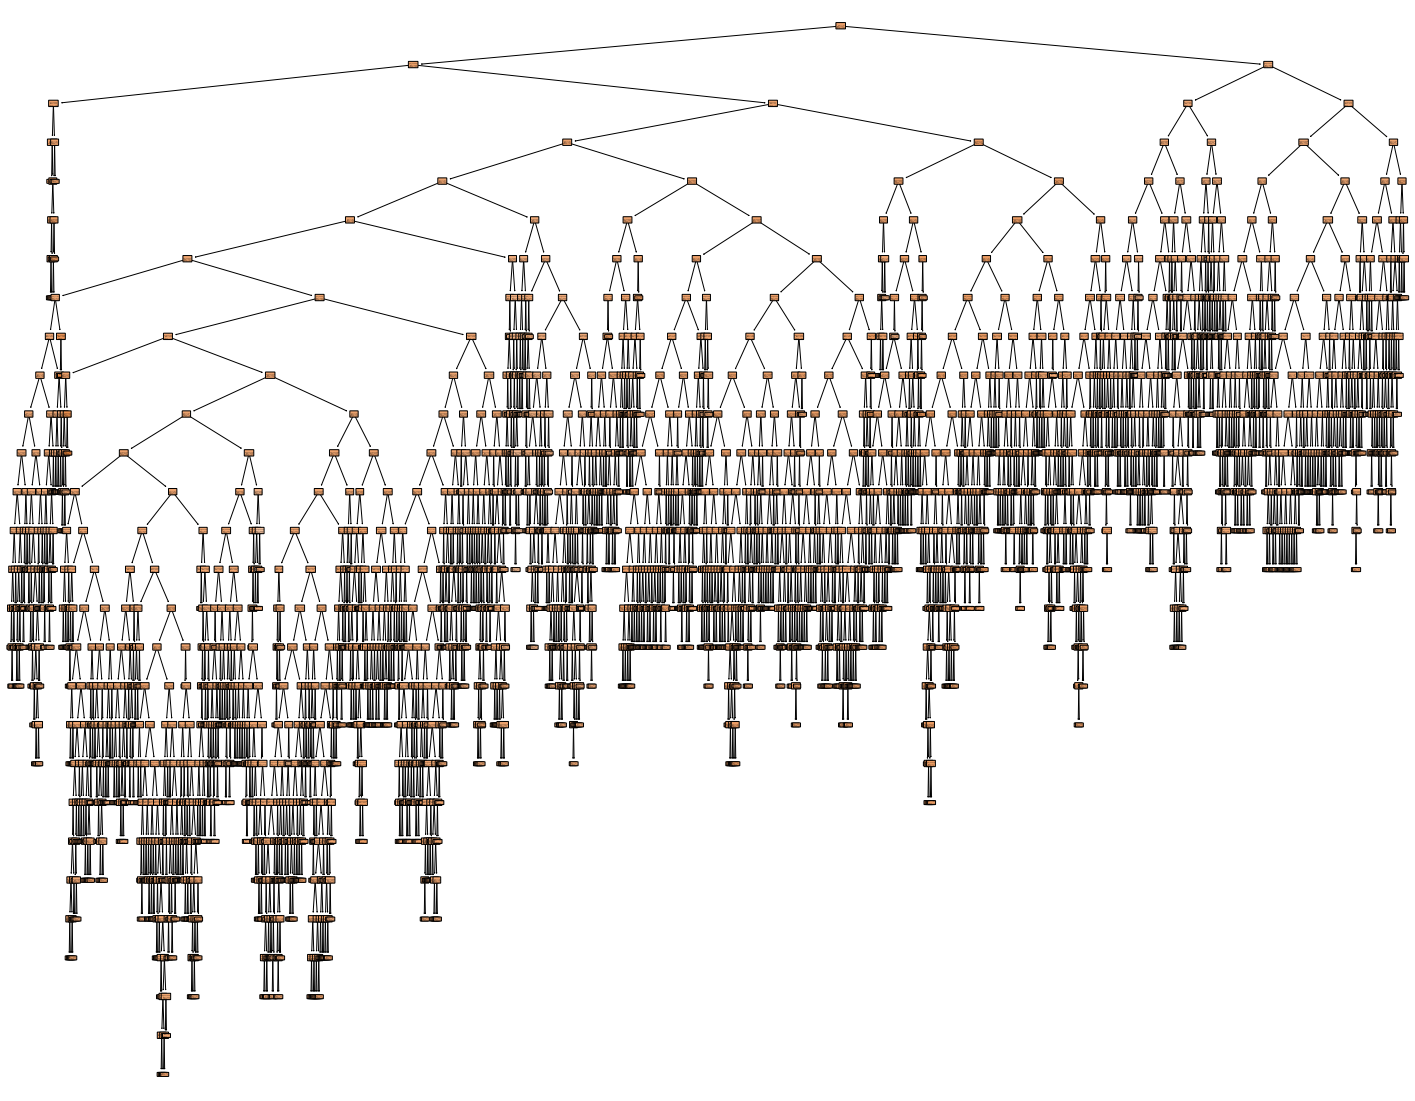

In [63]:
# tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree( trees_fit , filled = True , rounded = True  )

An important method to improve predictive performance is called "Pruning the Tree". This
means the process of cutting down the branches of a tree. We apply pruning to the complex tree above to reduce the depth. Initially, we determine the optimal complexity of the regression tree.

Now, we can prune the tree and visualize the prediction rule.

## cost_complexity_pruning_path:

DecisionTree in sklearn has a function called cost_complexity_pruning_path, which gives the effective alphas of subtrees during pruning and also the corresponding impurities. In other words, we can use these values of alpha to prune our decision tree-

In [64]:
trees = DecisionTreeRegressor( random_state = 0, min_impurity_decrease = 0.001 )

https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

In [66]:
path = trees.cost_complexity_pruning_path( model_X_basic_train, y_basic_train )

alphas, impurities = path.ccp_alphas, path.impurities

In [67]:
alphas

array([0.        , 0.00125697, 0.00149946, 0.00802735, 0.00830566,
       0.02244179])

In [68]:
mean1, std1 = [], []

for i in alphas:
     tree_initial = DecisionTreeRegressor(ccp_alpha=i, random_state=0)
# 10 fold cross validation for each alpha value
     scores = cross_val_score(tree_initial, model_X_basic_train, y_basic_train, scoring='neg_mean_squared_error', cv=10)
     mean1.append(scores.mean()), std1.append(scores.std())
            
# keep a record of the values of alpha, mean accuracy rate, standard deviation of accuracies

table = pd.DataFrame({"alpha": alphas, "mean": mean1, "std": std1})
table["mean"] = (-1)*table["mean"]
table = table.sort_values(["mean"], ascending = True)
table.head(10)


,alpha,mean,std
1,0.001257,0.390001,0.040414
2,0.001499,0.391442,0.040284
3,0.008027,0.399615,0.042079
4,0.008306,0.410904,0.046696
5,0.022442,0.429773,0.046135
0,0.000000,0.437964,0.042391


In [69]:
prune_tree =  DecisionTreeRegressor(ccp_alpha=table.iloc[1,0], random_state=0)

prune_tree_fit = prune_tree.fit(model_X_basic_train, y_basic_train)

In [70]:
prune_tree_fit.get_depth()  # depth's tree

5

In [71]:
prune_tree_fit.get_n_leaves() # number leaves tree

6

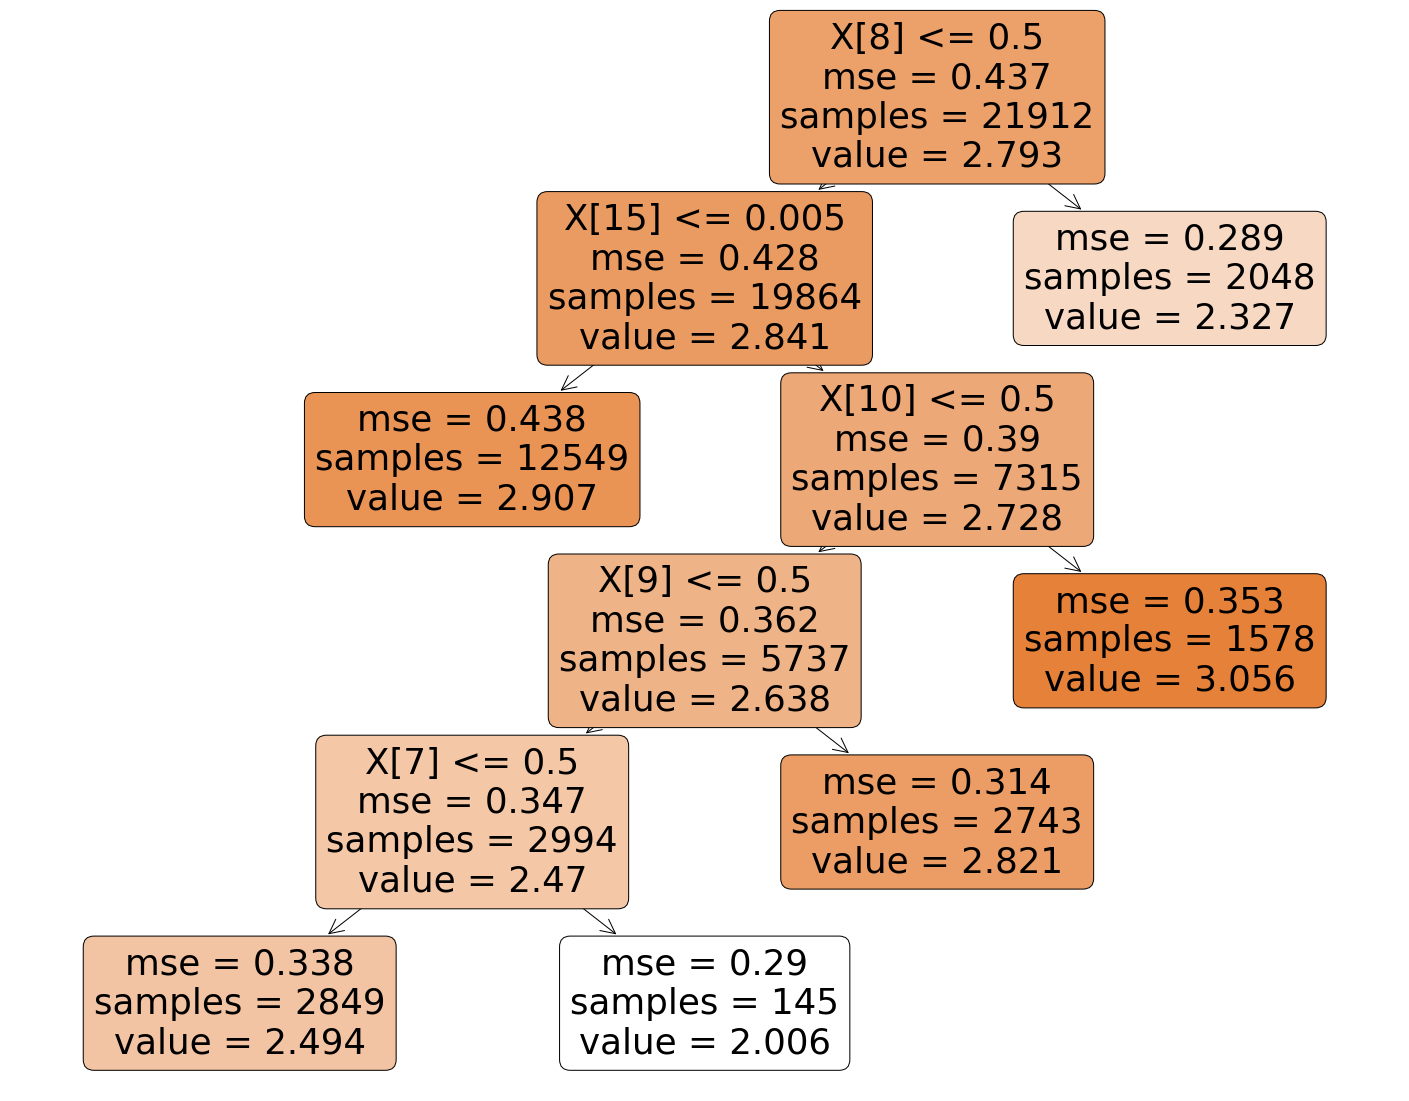

In [72]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree( prune_tree_fit , filled = True , rounded = True  )

In [74]:
#list(model_X_basic_train.columns)[8]

'female:hsg'

In [75]:
#list(model_X_basic_train.columns)[15]

'female:exp2'

In [64]:
#Using  GridSearchCV

#from sklearn.model_selection import GridSearchCV

In [76]:
#param_grid = {
# "max_depth":list(range(5,15,2)),
# "min_samples_split":list(range(2, 300,10)),
# "ccp_alpha": [x/10000 for x in range(10, 50,2)]
#}
#gridSearch = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, cv=10, n_jobs=-1)
#gridSearch.fit(model_X_basic_train, y_basic_train)
#print("score: ", gridSearch.best_score_)
#print("parameters: ", gridSearch.best_params_)

In [77]:
#prunedtree2 = DecisionTreeRegressor(random_state = 0, max_depth=13, ccp_alpha=0.001, min_samples_split=102)
#prune_tree_fit2 = prunedtree2.fit(model_X_basic_train, y_basic_train)

In [78]:
#prune_tree_fit2.get_depth()

In [79]:
#prune_tree_fit2.get_n_leaves()

In [80]:
#model_X_basic_train.columns

In [82]:
#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree( prune_tree_fit2 , filled = True , rounded = True )

In [81]:
y_hat_pt = prune_tree_fit.predict(model_X_basic_test)

MSE_pt= sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - y_hat_pt.reshape(-1,1))**2 ) , np.ones( y_hat_pt.shape )  ).fit().summary2().tables[1].round(3)
R2_pt = 1- MSE_pt.iloc[0,0] / np.var( Y_test )

print( f"R^2 using prune tree: {R2_pt}")

R^2 using prune tree: 0.0912558367720907


## Results

In [96]:
table= np.zeros( (14, 3) )
table[0,0:2]   = MSE_lm_basic
table[1,0:2]   = MSE_lm_flex
table[2,0:2]   = MSE_lasso.iloc[0, [0, 1]]
table[3,0:2]   = MSE_lasso_post.iloc[0, [0, 1]]
table[4,0:2]   = MSE_lasso_flex.iloc[0, [0, 1]]
table[5,0:2]   = MSE_lasso_post_flex.iloc[0, [0, 1]]
table[6,0:2]   = MSE_lasso_cv_basic.iloc[0, [0, 1]]
table[7,0:2]   = MSE_ridge_basic.iloc[0, [0, 1]]
table[8,0:2]   = MSE_elnet_basic.iloc[0, [0, 1]]
table[9,0:2]   = MSE_lasso_cv_flex.iloc[0, [0, 1]]
table[10,0:2]  = MSE_ridge_flex.iloc[0, [0, 1]]
table[11,0:2]  = MSE_elnet_flex.iloc[0, [0, 1]]
table[12,0:2]  = MSE_rt.iloc[0, [0, 1]]
table[13,0:2]  = MSE_pt.iloc[0, [0, 1]]



table[0,2]   = R2_lm_basic
table[1,2]   = R2_lm_flex
table[2,2]   = R2_lasso
table[3,2]   = R2_lasso_post
table[4,2]   = R2_lasso_flex
table[5,2]   = R2_lasso_post_flex
table[6,2]   = R2_lasso_cv_basic
table[7,2]   = R2_ridge_basic
table[8,2]   = R2_elnet_basic
table[9,2]   = R2_lasso_cv_flex
table[10,2]  = R2_ridge_flex
table[11,2]  = R2_elnet_flex
table[12,2]  = R2_rt
table[13,2]  = R2_pt




colnames_table= ["MSE", "S_E_ for MSE", "R-squared"]
rownames_table= ["Least Squares (basic)","Least Squares (flexible)", "Lasso", "Post-Lasso","Lasso (flexible)","Post-Lasso (flexible)", \
                    "Cross-Validated lasso", "Cross-Validated ridge","Cross-Validated elnet","Cross-Validated lasso (flexible)","Cross-Validated ridge (flexible)","Cross-Validated elnet (flexible)",  \
                    "Regression tree", "Pruned Tree"]
table_pandas = pd.DataFrame( table, columns = colnames_table )
table_pandas.index = rownames_table

table_pandas = table_pandas.round(3)
table_html = table_pandas.to_latex()
table_pandas

,MSE,S_E_ for MSE,R-squared
Least Squares (basic),0.400,0.015,0.099
Least Squares (flexible),0.335,0.014,0.244
Lasso,0.400,0.015,0.098
Post-Lasso,0.402,0.015,0.094
Lasso (flexible),0.339,0.015,0.098
Post-Lasso (flexible),0.339,0.015,0.236
Cross-Validated lasso,0.399,0.015,0.001
Cross-Validated ridge,0.443,0.015,0.100
Cross-Validated elnet,0.400,0.015,0.098
Cross-Validated lasso (flexible),0.337,0.015,0.003


# 3. How to build a tree regresion?

#### Tree-building process

- First of all, the process is a top-down approach because it starts at the top by mentioning which is the predictor that most affects the outcome variable (output) and chooses the cutoff that minimizes the residual sum of squares in each group divided by the cutoff $ \sum_{i \in R_j} (Y_i - \hat{Y_{Rj}})^2 $ swhere the estimated value of Y is the mean of the Y values for the observations in $Rj$.Therefore, it is also called a greedy approach because at each step of the construction process the best split occurs at that particular step without looking ahead.  
- Starting from the first predictor, the predictor space is successively divided, choosing at each step which predictor most affects or determines the result variable. That way, it ultimately generates regions $ R_1, R_2, ... , R_J $, called terminal nodes or leaves, which are the mean of the values of the dependent variable for the observations in that region, given the predictors that are most measure determine Y in that region.
- The goal is to find the regions $ R_1, R_2, ... , R_J $ that minimize the residual sum of squares (RSS):
\begin{align}
\sum_{j=1}^{j} \sum_{i \in R_j} (Y_i - \hat{Y_{Rj}})^2
\end{align}
where $ \hat{Y_{Rj}} $ is the mean response for the training observations within the jth box.

#### Pruning regression trees

The deeper the tree, that is, the more we decompose and divide the observations according to the predictors, the better the approximation to the regression function. However, it increases the estimation noise because there are fewer observations per terminal node to estimate the predicted value of the node. To improve the predictive performance it is necessary to "prune the tree" or cut branches. The pruning regression tree tries to find the correct depth.